# Лабораторная работа №2

ФИО:   
Группа: 

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

Я открыл и прочитал файл, данные представленны в виде таблицы, разделил их запятой


In [4]:
import pandas as pd
data = pd.read_csv("data.csv", sep=',')  # если нужно, можно поменять разделитель
data

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Engineering Sciences,Yes,19,Male,Yes,Yes,4,5,4,3,4,4,5,Yes,Positivity,NaN,1
215,Engineering Sciences,Yes,19,Male,Yes,No,2,2,2,2,2,2,2,No,Work Ethic,Just not interested! (Want to work in the corp...,0
216,Engineering Sciences,Yes,22,Female,Yes,Yes,3,4,4,3,4,4,3,No,Vision,NaN,1
217,Engineering Sciences,No,19,Male,Yes,No,1,2,2,3,3,2,2,No,Passion,Lack of Knowledge,0


## 2. Описание постановки задачи
Переменные:
EducationSector: Сектор образования (например, высшее образование, профессиональное образование и т.д.). Это может быть категориальная переменная, влияющая на другие аспекты, такие как мотивация или успех.

IndividualProject: Указывает на наличие индивидуального проекта. Это может быть бинарная переменная (да/нет), которая показывает, работает ли человек над личным проектом.

Age: Возраст индивида. Непрерывная переменная, которая может влиять на карьерные выборы и мотивацию.

Gender: Пол индивида (мужской, женский). Категориальная переменная, которая может быть связана с различиями в мотивации и успехе.

City: Город проживания. Это может быть категориальная переменная, отражающая различные уровни доступа к ресурсам и возможностям в зависимости от региона.

Influenced: Уровень влияния внешних факторов (например, семья, друзья, учителя). Это может быть количественная переменная, отражающая степень влияния.

Perseverance: Уровень настойчивости. Количественная переменная, отражающая личные качества, способствующие достижению целей.

DesireToTakeInitiative: Степень желания принимать инициативу. Количественная переменная, показывающая готовность к действиям.

Competitiveness: Уровень конкурентоспособности. Количественная переменная, которая может влиять на успех в образовании или карьере.

SelfReliance: Уровень самостоятельности. Количественная переменная, отражающая способность действовать без внешней помощи.

StrongNeedToAchieve: Сильная потребность в достижениях. Количественная переменная, показывающая внутреннюю мотивацию к успеху.

SelfConfidence: Уровень самоуверенности. Количественная переменная, связанная с уверенность в собственных силах.

GoodPhysicalHealth: Уровень физического здоровья. 

переменные от Perseverance до GoodPhysicalHealth измеряются от 1-5

MentalDisorder: Наличие психических расстройств. Бинарная переменная (да/нет), которая может негативно влиять на личные достижения и качество жизни.

KeyTraits: Основные личные качества. Категориальная переменная, охватывающая различные черты личности, которые могут влиять на успех.

ReasonsForLack: Причины недостатка ресурсов или мотивации. Категориальная переменная, объясняющая, почему человек не достиг определённых целей.

y: Целевое событие, которое необходимо предсказать. 1 = "успех", 0 = "недостаток успеха".

In [6]:
df = data 
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


## 3. Распределение целевой переменной

Мы наблюдаем дисбаланс, количество успеха больше

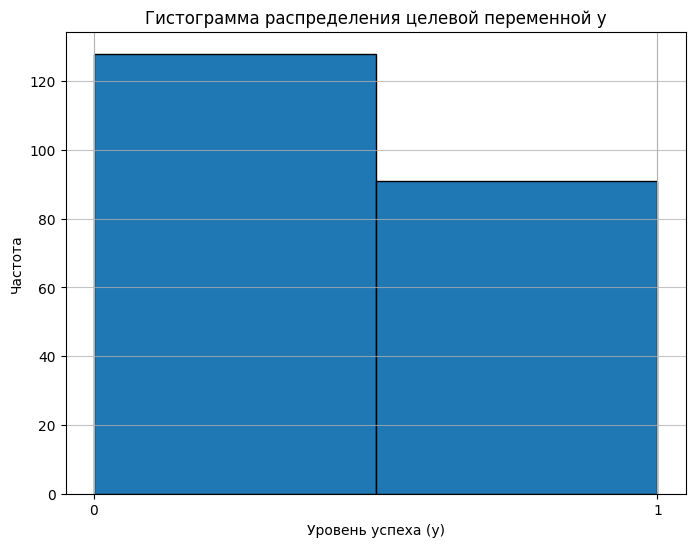

Количество уникальных значений целевой переменной: 2
Уникальные значения: [1 0]


In [7]:
import matplotlib.pyplot as plt

# Построим гистограмму для целевой переменной y
plt.figure(figsize=(8, 6))
df['y'].hist(bins=2, edgecolor='black')
plt.title('Гистограмма распределения целевой переменной y')
plt.xlabel('Уровень успеха (y)')
plt.ylabel('Частота')
plt.xticks([0, 1])  # Поскольку y принимает значения только 0 и 1
plt.grid(axis='y', alpha=0.75)
plt.show()

# Подсчет уникальных значений
unique_values = df['y'].unique()
num_unique_values = len(unique_values)

print(f'Количество уникальных значений целевой переменной: {num_unique_values}')
print(f'Уникальные значения: {unique_values}')


## 4. Основные статистики по переменным в датасете

In [8]:
df.describe()

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,y
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,19.753425,3.351598,3.621005,3.589041,3.721461,3.908676,3.575342,3.561644,0.415525
std,1.289842,0.995234,1.152467,1.110859,1.053629,1.023068,1.120098,1.100287,0.493941
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,19.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
50%,20.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,20.000000,4.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,1.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


## 5. Основную информацию по датасету

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
 14  KeyTraits               219 non-null    object
 15  Reason

## 6. Количество пропусков

Замена на наиболее частое значение: Если эта колонка содержит категориальные данные (например, причины недостатка мотивации)

df['ReasonsForLack'].fillna(df['ReasonsForLack'].mode()[0], inplace=True)

Замена на специальное значение: Если пропуски означают, что данные просто отсутствуют 

df['ReasonsForLack'].fillna('Unknown', inplace=True)

In [10]:
# Подсчет количества пропусков в каждом столбце
missing_values = df.isnull().sum()
missing_values

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64

## 7. Гистограммы

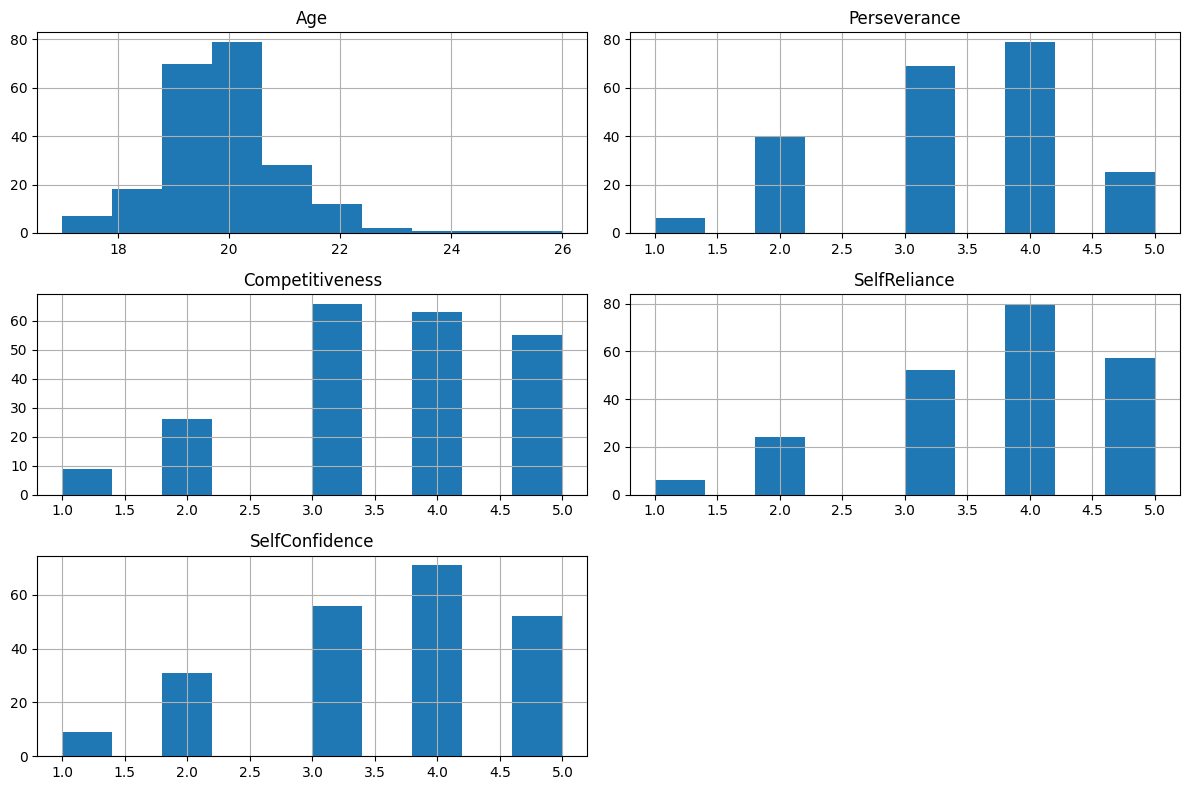

In [11]:
features = ['Age', 'Perseverance', 'Competitiveness', 'SelfReliance', 'SelfConfidence']

# Построение гистограмм
df[features].hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

## 8.

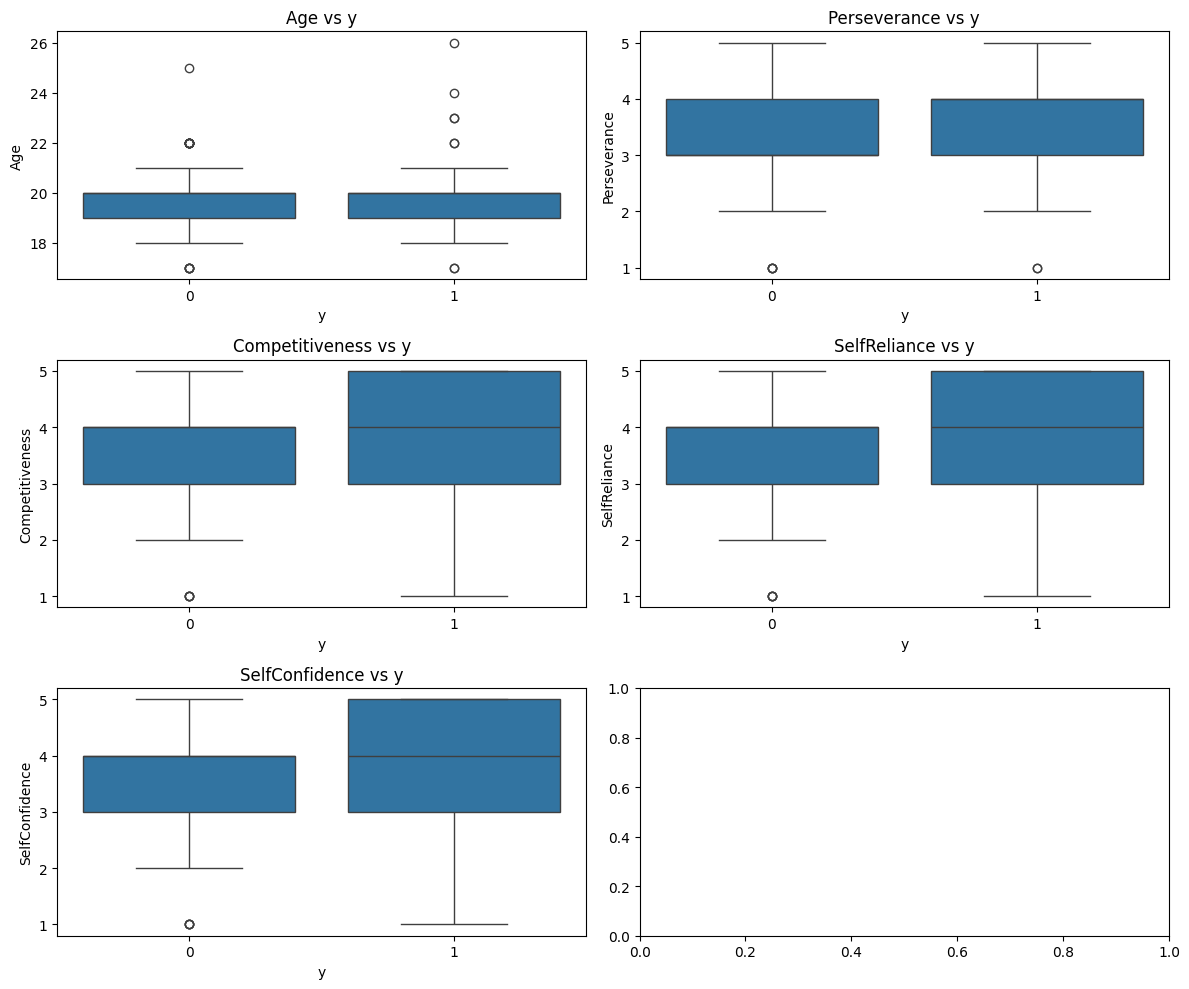

In [21]:
import seaborn as sns

# Выбираем 5 признаков для построения графиков зависимости от целевой переменной
features = ['Age', 'Perseverance', 'Competitiveness', 'SelfReliance', 'SelfConfidence']

# Построение графиков зависимости признаков от целевой переменной
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x='y', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs y')

plt.tight_layout()
plt.show()
